<a href="https://colab.research.google.com/github/dldmldlsy/ovenCV/blob/master/OpenCV_2_SaltnPepper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import random

img_src=cv2.imread('Lenna.png')

[114 140 230]
140
[255 255 255]


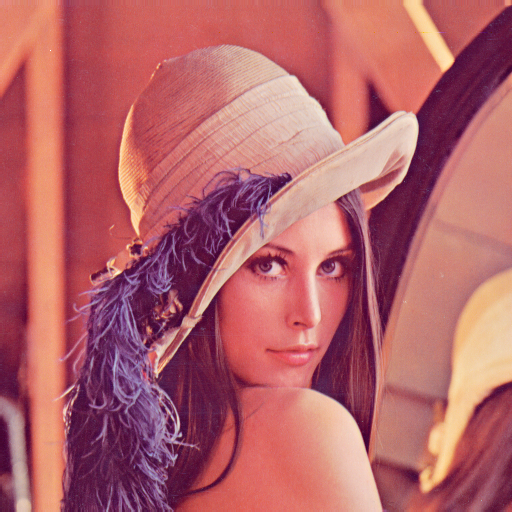

In [ ]:
#이미지 픽셀값에 접근하는법= 픽셀값을 읽어오는법
print(img_src[50,50])#(행번호, 열번호) #B G R 순서대로
print(img_src[50,50,1]) #블루밴드에 있는 픽셀값 
#2는 green, 3은 red밴드 픽셀값 보여줌 안쓰면 다 보여줌. 


#픽셀값을 바꾸는 법
img_src[50,50]=[255,255,255] 
print(img_src[50,50]) # [255 255 255] 출력
cv2_imshow(img_src)

In [ ]:
#사진 자르기(슬라이싱) 세로로 잘라보겠습니당. 
#이미지 크기를 알려면 shape=> 512행 512열 3개의 밴드(채널)로 이루어져있다.
img_src.shape #row, col, band(channel)순으로 출력됩니다  

(512, 512, 3)

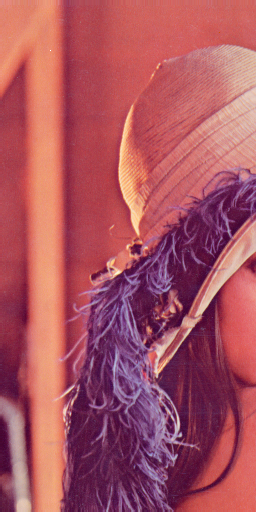

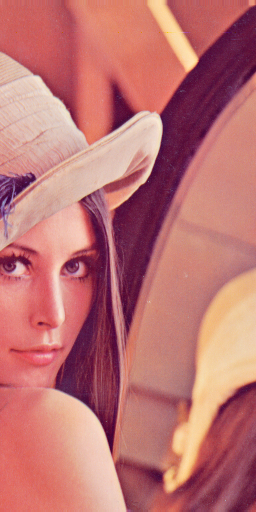

In [ ]:
#:는 ~로 이해하시면 됩니당
#만약 끝에서 끝까지면 [:,:] 
#행열을 []안에 넣어주면됨. 행은 세로방향이므로 자르지않음 (세로로 자를 거니까.)
#다쓰겠다= : 
limage=img_src[:,:256] #왼쪽 이미지= [다쓰겠다=:, 왼쪽 끝부터 256까지(반) = :256]
rimage=img_src[:,256:] # 오른쪽이미지=[다쓰겠다=:, 256부터 끝까지(나머지반)=256:]
cv2_imshow(limage)
cv2_imshow(rimage)

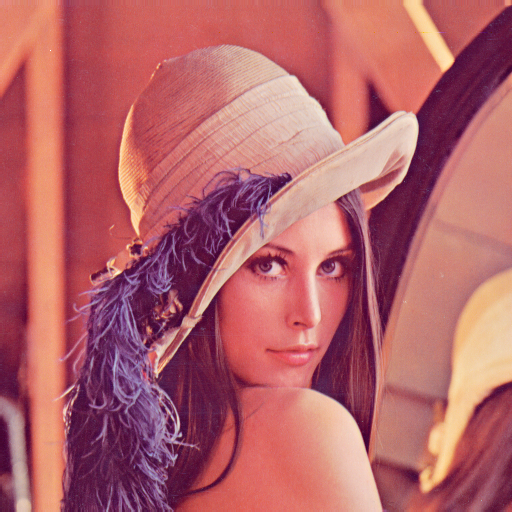

In [ ]:
#이미지 붙이기
#concatenate : 연쇄시키다 연속시키다. 
#cv2.hconcat #h: horizontal 수평방향으로 이미지붙이기
#cv2.vconcat #v: vertical 수직 방향으로 이미지 붙이기
img_recover=cv2.hconcat([limage,rimage]) #([])안에 먼저올 이미지부터 써주기 대괄호까먹지말기!
cv2_imshow(img_recover)

In [ ]:
#salt and pepper 함수 정의
def salt_and_pepper(img):
  row,col, band = img.shape 
  number=random.randint(300,10000) 
  #random lib의 randint라는 함수를 쓰겠다! 300~10000 사이 정수형 랜덤
  for i in range(number):
    row_num=random.randint(0,row-1) #0~행 개수-1 랜덤
    col_num=random.randint(0,col-1) #0~열 개수-1 랜덤
    img[row_num][col_num]=255 #흰색 소금  (255는 흰색~이렇게 하면 rgb값 한번에 바꿀 수 있다!) 
  
  number=random.randint(300,10000) 
  for i in range(number):
    row_num=random.randint(0,row-1) 
    col_num=random.randint(0,col-1)
    img[row_num][col_num]=0 #검정 후추 
  
  return img
#랜덤한 개수만큼 랜덤한 행과 랜덤한 열에 흰색 소금을 뿌리고
#랜덤한 개수만큼 랜덤한 행과 랜덤한 열에 검정 후추를 뿌렸음.

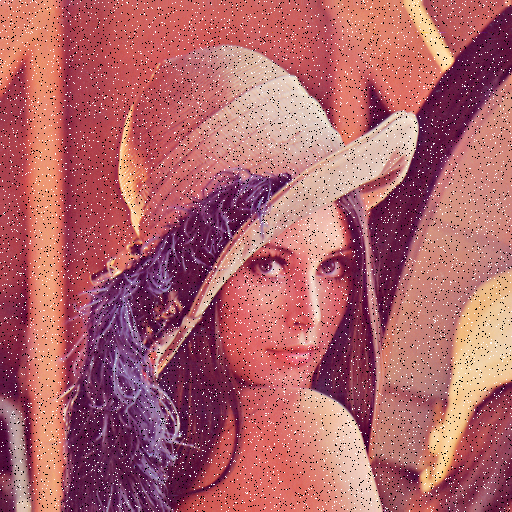

In [ ]:
img_snp=salt_and_pepper(img_src)
cv2_imshow(img_snp)
cv2.imwrite("소금후추결과.png",img_snp) #이미지 저장하는 함수입니다.왼쪽 파일함에 자동으로 뜰텐데, 뜨지 않는다면 파일새로고침모양 아이콘 누르기!
#이미지 왼쪽 파일에서 마우스 우클릭 후 다운로드해서 저장해주시면 됩니당!
#bluring 해보면 재미있겠다. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


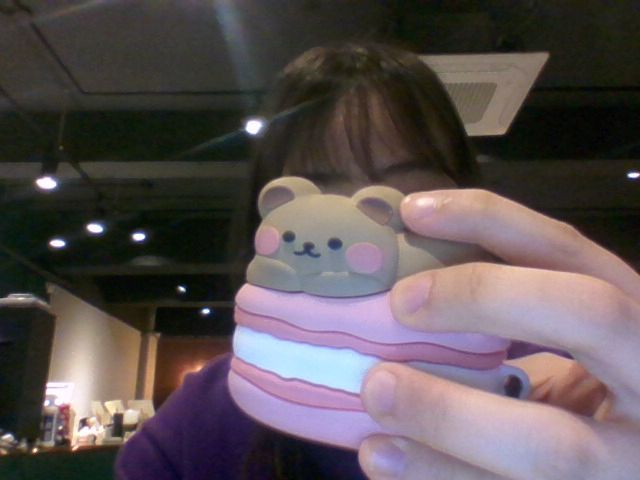

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#과제:웹캠을 캡처한 사진을 이용하여, 특정부분만 bluring 처리해보기!


과제:웹캠을 캡처한 사진을 이용하여, 특정부분만 bluring 처리해보기!
1.photo.jpg 읽어와야겠죠!. 2.col,row의 개수를 알아야겠죠!.
3.bluring을 하고싶은 부분만 slicing 해야겠죠.
4.bluring을 하지 않을 부분도 slicing.
5.bluring함수 이용해서 처리하기.
6.bluring처리한 이미지와 bluring하지 않을 부분의 이미지를 붙여주기(concat).

[ ]



In [ ]:
# 이미지 저장하는 방법
#cv.imwrite("이름.jpg",이미지소스)